**<h1>EDA on variance of tree characteristics across the neighborhoods of Pittsburgh</h1>**

In [3]:
#!pip install -U plotly
#!pip install -U kaleido
#!pip install ipywidgets

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image

In [5]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.4.0


In [6]:
df_trees = pd.read_csv("/cleaned_tree_data_5.csv", encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**<h3>Average tree height by species </h3>**

In [58]:
#Average height of tree species in increasing order
df_height_spec = df_trees.groupby("common_name")["height"].mean()
df_height_spec = df_height_spec.to_frame().reset_index()
df_height_spec.columns = ['common_name', 'average_height']
df_height_spec = df_height_spec.sort_values(by=['average_height'], ascending = False)
#Top 10 tallest trees species (average height) across pittsburgh
df_height_spec.head(10)

,common_name,average_height
40,Cottonwood: Eastern,52.800000
25,Butternut,45.833333
103,London planetree,43.155996
142,Oak: Pin,42.351203
81,Hickory: Bitternut,41.632653
178,Poplar: White,40.000000
222,Willow: Black,39.600000
122,Maple: Silver,38.936686
102,Locust: Black,38.511367
208,Sycamore: American,37.615631


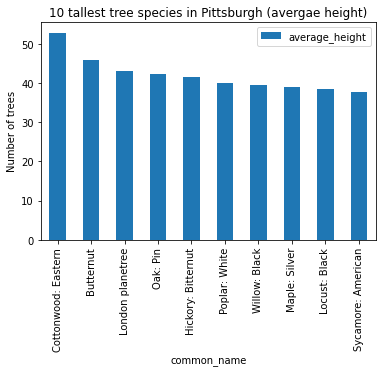

In [60]:
df_tallest_10 = df_height_spec.head(10)
ax = df_tallest_10.plot.bar(x='common_name', y='average_height', rot='vertical', ylabel = 'Number of trees', title= "10 tallest tree species in Pittsburgh (avergae height)")

**<h3>Average Tree Height across Neighborhoods</h3>**

Top 10 neighborhoods with the highest average tree height

In [9]:
df_height = df_trees.groupby("neighborhood")["height"].mean()
df_height = df_height.to_frame().reset_index()
df_height.columns = ['neighborhood', 'average_height']
df_height1 = df_height.sort_values(by=['average_height'], ascending = False)
df_height1.head(10)

,neighborhood,average_height
37,Hays,45.000000
31,Fairywood,42.964286
4,Arlington Heights,42.748561
77,St. Clair,38.500000
20,Chartiers City,36.318221
57,Northview Heights,35.333333
32,Fineview,34.524743
75,Squirrel Hill North,33.534065
46,Lincoln-Lemington-Belmar,33.336483
27,East Hills,33.173275


<h4>Choropleth map for average tree height across the neighborhoods of Pittsburgh</h4>

In [10]:
fig=px.choropleth(df_height,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='average_height',
              color_continuous_scale='blues',
               title='Average Tree Height across Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

**<h3>Average Tree Width across Neighborhoods</h3>**

Top 10 neighborhoods with the highest average tree width

In [13]:
df_width = df_trees.groupby("neighborhood")["width"].mean()
df_width = df_width.to_frame().reset_index()
df_width.columns = ['neighborhood', 'average_width']
df_width1 = df_width.sort_values(by=['average_width'], ascending = False)
df_width1.head(10)

,neighborhood,average_width
77,St. Clair,13.454069
32,Fineview,13.243513
4,Arlington Heights,11.448097
75,Squirrel Hill North,10.632508
20,Chartiers City,10.600609
80,Summer Hill,10.392978
16,Central Business District,10.152232
26,East Carnegie,10.027174
57,Northview Heights,9.750436
31,Fairywood,9.698687


<h4>Choropleth map for average tree width across the neighborhoods of Pittsburgh</h4>

In [61]:
fig=px.choropleth(df_width,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='average_width',
              color_continuous_scale='blues',
               title='Average Tree Width across Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

**Inference** : 7 of the top 10 neighborhoods with the highest average tree height are also present in the top 10 neighborhoods with the highest average tree width. While there seems to be positive correlation between the average height and average width (tall trees tend to have more width), this can't be considered as a strong correlation. A strange observation is that the neighborhood 'Hays' has the highest average tree height in pittsburgh. However, it has one of the lowest average tree width in Pittsburgh!

**<h3>The most prevalent species in each neighborhood</h3>**

In [18]:
groupBySpeciesAndNeighborhood = df_trees.groupby(['neighborhood','common_name'])['id'].count()
groupBySpeciesAndNeighborhood = groupBySpeciesAndNeighborhood.to_frame().reset_index()
prevalent_species = groupBySpeciesAndNeighborhood.loc[groupBySpeciesAndNeighborhood.groupby(['neighborhood'])['id'].idxmax()].reset_index(drop=True)
prevalent_species

,neighborhood,common_name,id
0,Allegheny Center,London planetree,109
1,Allegheny West,Pear: Callery,44
2,Allentown,Pear: Callery,14
3,Arlington,Hemlock: Eastern,14
4,Arlington Heights,Locust: Black,2
...,...,...,...
85,Upper Lawrenceville,Pear: Callery,65
86,West End,Pear: Callery,46
87,West Oakland,Honeylocust: Thornless,17
88,Westwood,Linden: Littleleaf,29


<h4>Choropleth map showing the tree species that is the highest in number in each neighborhood</h4>

In [ ]:
fig=px.choropleth(prevalent_species,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='common_name',
              color_continuous_scale='Inferno',
               title='Most prevalent species in each Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

The top 5 tree species that are the most prevalant in many neighborhoods

In [19]:
overall_prevalent = prevalent_species.groupby(['common_name'])['id'].count()
overall_prevalent = overall_prevalent.to_frame().reset_index()
overall_prevalent = overall_prevalent.sort_values(by=['id'], ascending = False)
overall_prevalent.head(5)

,common_name,id
11,Maple: Norway,18
17,Pear: Callery,12
9,London planetree,10
7,Linden: Littleleaf,9
6,Honeylocust: Thornless,7


**Inference:** It can be seen that Maple:Norway is the most prevalent species in 18 neighborhoods, followed by Pear:Callery which is the most prevalent in 12 neighborhoods and then London planetree which is the most prevalent in 10 neighborhoods and so on.

**<h3>Distribution of species across neighborhoods</h3>**


In [57]:
#Selecting tree species whose count is more than 50
df_trees_thresh = df_trees.groupby(['common_name'])['id'].count()
df_trees_thresh1 = df_trees_thresh.to_frame().reset_index()
df_trees_thresh1 = df_trees_thresh1.sort_values(by=['id'], ascending = False)
df_trees_thresh1 = df_trees_thresh1[df_trees_thresh1['id'] > 50]
df_trees_thresh1

,common_name,id
118,Maple: Norway,3717
120,Maple: Red,3421
103,London planetree,3224
156,Pear: Callery,2969
217,Vacant Site Small,2418
...,...,...
190,Serviceberry: spp.,66
202,Spruce: White,59
87,Hophornbeam: American,58
143,Oak: Sawtooth,57


**Run the following cell and select a species from the dropdown menu and run the following cells to visualize the distribution of the selected species across the neighborhoods of Pittsburgh.**

In [48]:
#Run this cell
#Select a species from the dropdown menu
#Run the following cells
selected_spec = widgets.Dropdown(options = df_trees_thresh1.common_name, value=None, description='Species:')
print("\nSelect a species\n")
display(selected_spec)


Select a species



Dropdown(description='Species:', options=('Maple: Norway', 'Maple: Red', 'London planetree', 'Pear: Callery', …

In [50]:
df_spec = df_trees.groupby(['common_name', 'neighborhood'])['id'].count()
df_spec = df_spec.to_frame().reset_index()
df_spec = df_spec.loc[df_spec['common_name'] == selected_spec.value]
#df_spec['percent'] = ((df_spec['id']/df_spec['id'].sum()) * 100)
df_spec = df_spec.rename(columns={"id": "count"})
df_spec

,common_name,neighborhood,count
1968,Maple: Norway,Allegheny Center,48
1969,Maple: Norway,Allegheny West,21
1970,Maple: Norway,Allentown,9
1971,Maple: Norway,Arlington,9
1972,Maple: Norway,Banksville,39
...,...,...,...
2041,Maple: Norway,Upper Hill,18
2042,Maple: Norway,Upper Lawrenceville,26
2043,Maple: Norway,West End,12
2044,Maple: Norway,Westwood,26


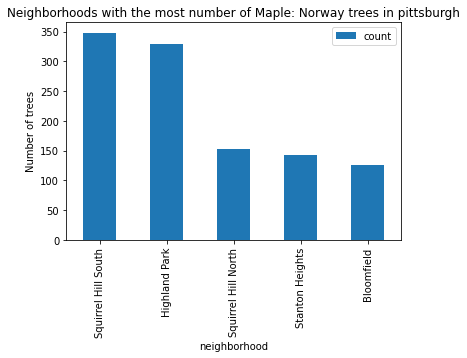

In [51]:
str1 = "Neighborhoods with the most number of " + str(selected_spec.value) + " trees in pittsburgh"
df_spec1 = df_spec.sort_values(by=['count'], ascending = False)
df_spec1 = df_spec1.head(5)
ax = df_spec1.plot.bar(x='neighborhood', y='count', rot='vertical', ylabel = 'Number of trees', title= str1)


In [55]:
full_neigh = pd.DataFrame({'neighborhood' : df_trees['neighborhood'].unique()})
full_neigh = full_neigh.rename(columns={"id": "count"})
full_neigh = full_neigh.merge(df_spec, how = 'outer', on = ['neighborhood'])
full_neigh['count'] = full_neigh['count'].fillna(0)
full_neigh = full_neigh.drop('common_name', 1)
full_neigh.sort_values(['count'], ascending= False)

,neighborhood,count
26,Squirrel Hill South,348.0
4,Highland Park,329.0
42,Squirrel Hill North,153.0
5,Stanton Heights,142.0
28,Brighton Heights,125.0
...,...,...
37,Bedford Dwellings,0.0
77,Fairywood,0.0
62,Terrace Village,0.0
35,Arlington Heights,0.0


<h4>Choropleth map showing the distribution of the selected species across the neighborhoods of Pittsburgh</h4>

In [56]:
str2 = "Distribution of " + str(selected_spec.value) + " across neighborhoods of Pittsburgh"
fig=px.choropleth(full_neigh,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='count',
              color_continuous_scale= 'blues',
               title= str2 ,  
               height=700,
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.layout.template = None
fig.show()

**<h3>Research Questions</h3>**
1. Is there a correlation between the height of a tree species and its benefits? If yes, what is the type of correlation? Does the data imply whether neighborhood with tall trees are benefitted more or benefitted less compared to neighborhood with short trees? Can we derive insights from this data on whether planting tree species that are tall provide more benefits to the neighborhood or not, so that it will be useful for lanscaping and planning?


